# Supervised Machine Learning : Student success prediction
In this assignment, I will build a supervised machine learning model using Linear Regression in order to predict student success

We will do the following steps in order to achieve our goal:
- Apply EDA and feature engineering on the dataset
- Implement and evaluate Linear Regression models

First, lets import the libraries:

In [168]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting style and theme
sns.set_palette('viridis')
sns.set_style('dark')


# Part 1: EDA
Task 1.1: Load the student data 
- Load the data and explore 

In [169]:
# Load dataset

file_path = os.path.join("data", "student_success_dataset.csv")

student_data = pd.read_csv(file_path)


In [170]:
student_data.head()

,student_id,age,gender,socioeconomic_status,previous_gpa,attendance_rate,participation_score,assignment_completion,family_support,study_resources,study_hours_per_week,first_generation_student,program_of_study,digital_literacy,previous_course_failures,extracurricular_hours,work_hours_per_week,distance_from_campus,final_grade,completed_course
0,STU0001,21,Non-binary,Low,3.35,0.73,10.0,63.8,High,"Textbooks, Online Resources",2.0,True,Business,3.1,0,1.7,15,5.6,100,True
1,STU0002,19,Male,Middle,4.00,0.83,6.2,45.7,Medium,"Textbooks, Online Resources, Tutoring",4.0,True,Computer Science,5.8,0,3.1,0,2.0,100,True
2,STU0003,21,Male,Low,1.72,0.72,9.1,90.3,High,"Online Resources, Tutoring",4.5,False,Economics,3.7,1,2.2,5,4.7,100,True
3,STU0004,24,Non-binary,Middle,3.09,0.81,6.5,58.9,High,"Textbooks, Online Resources, Tutoring",5.1,True,Mathematics,6.2,0,2.9,22,19.4,100,True
4,STU0005,19,Female,Low,2.24,0.83,9.1,93.0,High,"Textbooks, Online Resources, Study Group",4.5,True,Economics,8.0,0,5.4,15,9.3,100,True


In [171]:
print(student_data.describe())

              age  previous_gpa  attendance_rate  participation_score  \
count  500.000000    500.000000       500.000000           500.000000   
mean    19.814000      2.714360         0.717600             6.910200   
std      2.522723      0.667223         0.149643             1.854679   
min     17.000000      0.810000         0.280000             1.700000   
25%     17.000000      2.287500         0.620000             5.600000   
50%     20.000000      2.720000         0.740000             6.900000   
75%     21.000000      3.160000         0.830000             8.300000   
max     31.000000      4.000000         0.990000            10.000000   

       assignment_completion  study_hours_per_week  digital_literacy  \
count             500.000000            500.000000        500.000000   
mean               71.350400              5.808600          6.903600   
std                15.501443              3.340207          1.886899   
min                29.000000              0.700000    

In [172]:
# Display dataset information
print(student_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   student_id                500 non-null    object 
 1   age                       500 non-null    int64  
 2   gender                    500 non-null    object 
 3   socioeconomic_status      500 non-null    object 
 4   previous_gpa              500 non-null    float64
 5   attendance_rate           500 non-null    float64
 6   participation_score       500 non-null    float64
 7   assignment_completion     500 non-null    float64
 8   family_support            500 non-null    object 
 9   study_resources           500 non-null    object 
 10  study_hours_per_week      500 non-null    float64
 11  first_generation_student  500 non-null    bool   
 12  program_of_study          500 non-null    object 
 13  digital_literacy          500 non-null    float64
 14  previous_c

In [173]:
# Check for missing values
print(student_data.isnull().sum())

student_id                  0
age                         0
gender                      0
socioeconomic_status        0
previous_gpa                0
attendance_rate             0
participation_score         0
assignment_completion       0
family_support              0
study_resources             0
study_hours_per_week        0
first_generation_student    0
program_of_study            0
digital_literacy            0
previous_course_failures    0
extracurricular_hours       0
work_hours_per_week         0
distance_from_campus        0
final_grade                 0
completed_course            0
dtype: int64


In [174]:
# Display number of rows and columns in the dataset
print("\nShape of the dataset (rows, columns):", student_data.shape)


Shape of the dataset (rows, columns): (500, 20)


In [175]:
# Check for unique values in categorical columns
categorical_cols = student_data.select_dtypes(include=['object']).columns
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"\n{col}: {student_data[col].unique()}")


Unique values in categorical columns:

student_id: ['STU0001' 'STU0002' 'STU0003' 'STU0004' 'STU0005' 'STU0006' 'STU0007'
 'STU0008' 'STU0009' 'STU0010' 'STU0011' 'STU0012' 'STU0013' 'STU0014'
 'STU0015' 'STU0016' 'STU0017' 'STU0018' 'STU0019' 'STU0020' 'STU0021'
 'STU0022' 'STU0023' 'STU0024' 'STU0025' 'STU0026' 'STU0027' 'STU0028'
 'STU0029' 'STU0030' 'STU0031' 'STU0032' 'STU0033' 'STU0034' 'STU0035'
 'STU0036' 'STU0037' 'STU0038' 'STU0039' 'STU0040' 'STU0041' 'STU0042'
 'STU0043' 'STU0044' 'STU0045' 'STU0046' 'STU0047' 'STU0048' 'STU0049'
 'STU0050' 'STU0051' 'STU0052' 'STU0053' 'STU0054' 'STU0055' 'STU0056'
 'STU0057' 'STU0058' 'STU0059' 'STU0060' 'STU0061' 'STU0062' 'STU0063'
 'STU0064' 'STU0065' 'STU0066' 'STU0067' 'STU0068' 'STU0069' 'STU0070'
 'STU0071' 'STU0072' 'STU0073' 'STU0074' 'STU0075' 'STU0076' 'STU0077'
 'STU0078' 'STU0079' 'STU0080' 'STU0081' 'STU0082' 'STU0083' 'STU0084'
 'STU0085' 'STU0086' 'STU0087' 'STU0088' 'STU0089' 'STU0090' 'STU0091'
 'STU0092' 'STU0093' 'STU

### Task 1.2: Visualize the data


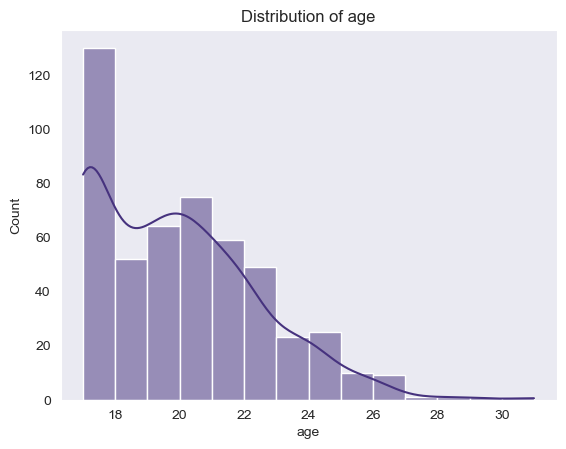

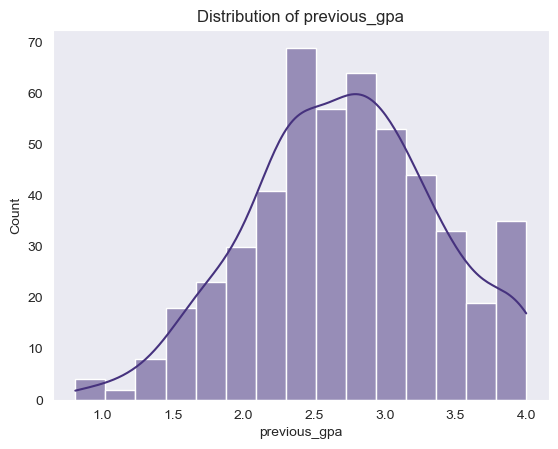

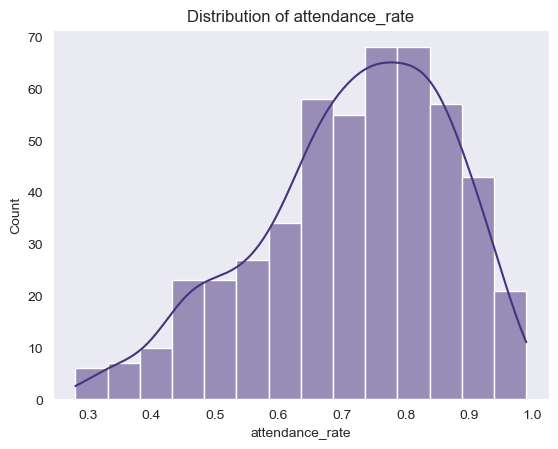

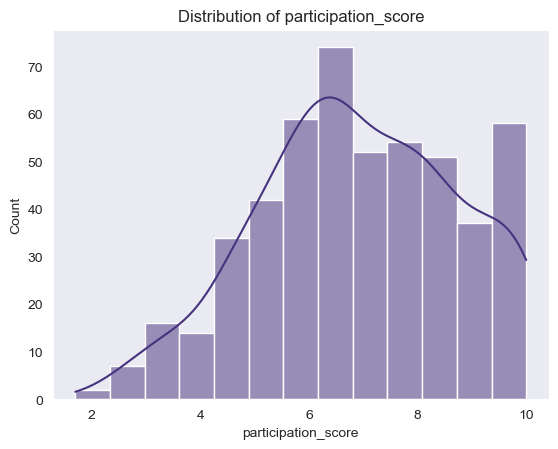

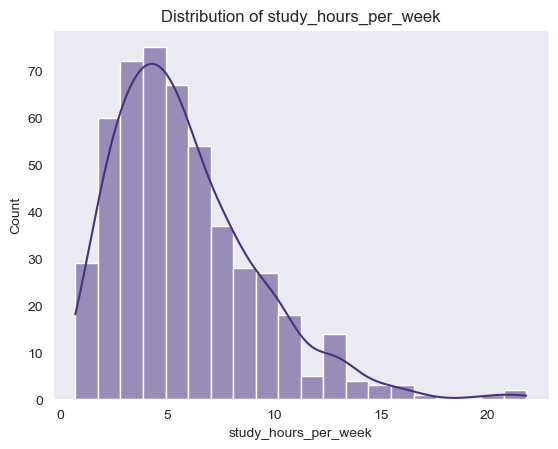

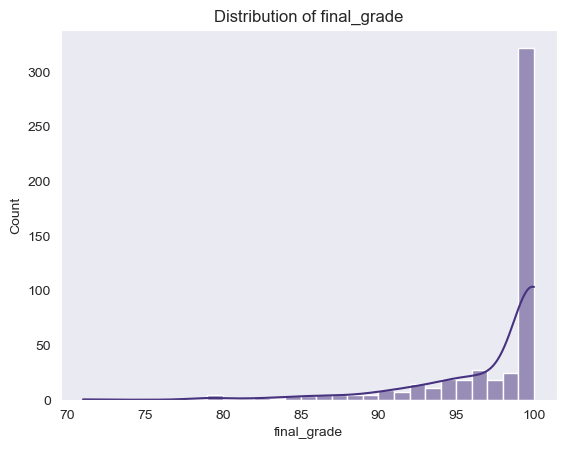

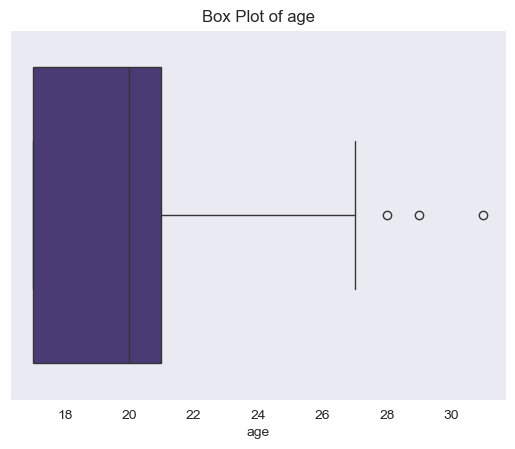

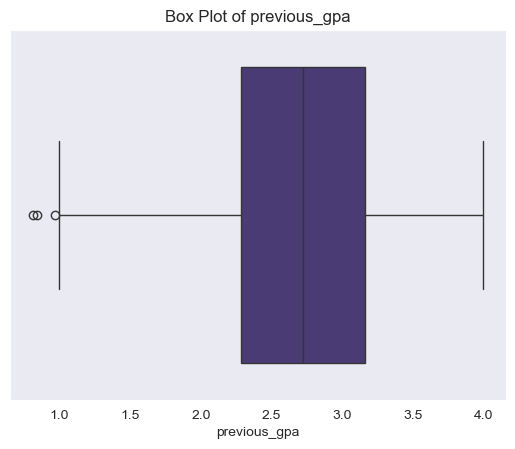

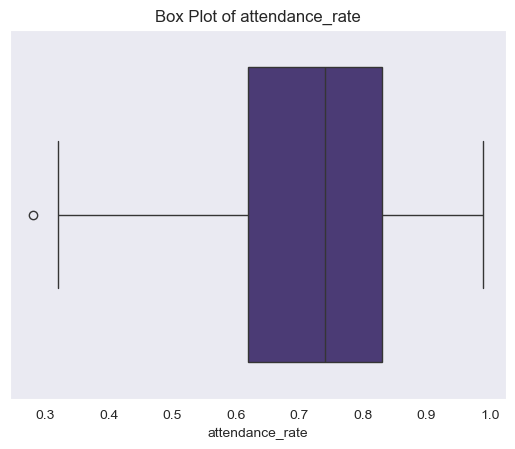

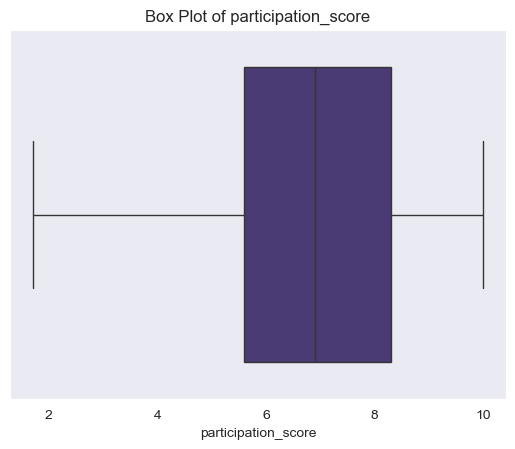

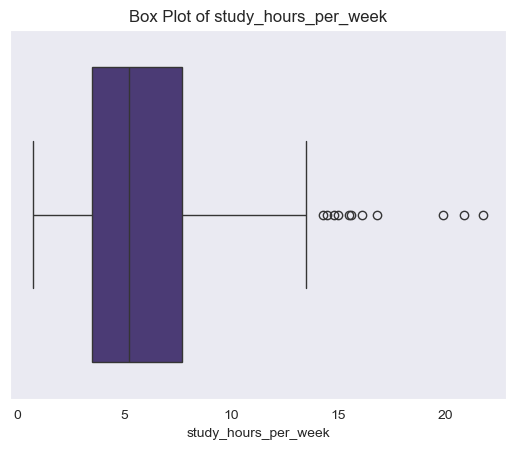

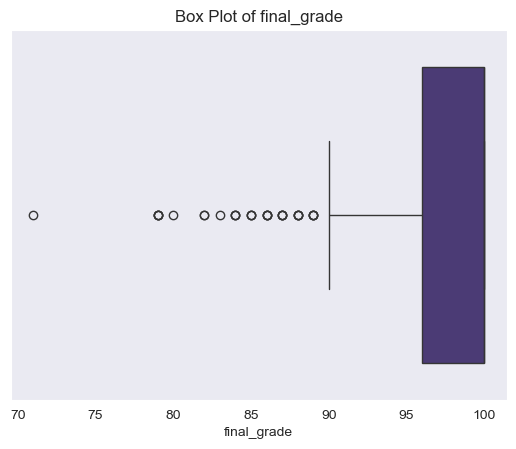

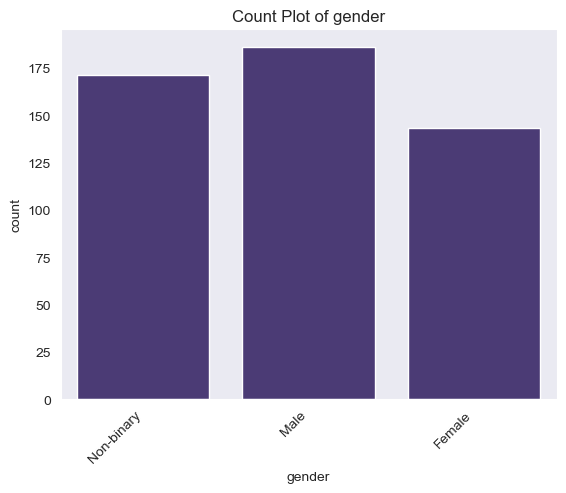

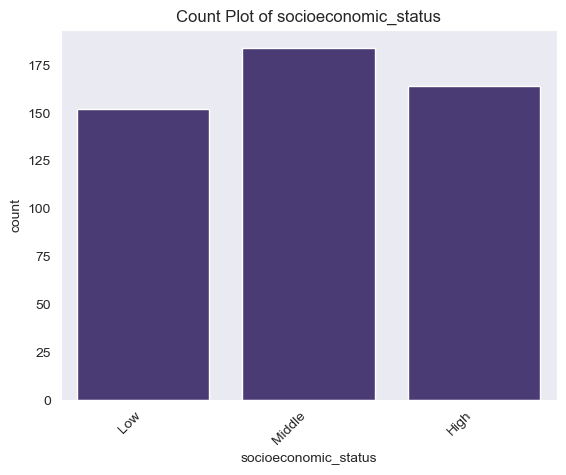

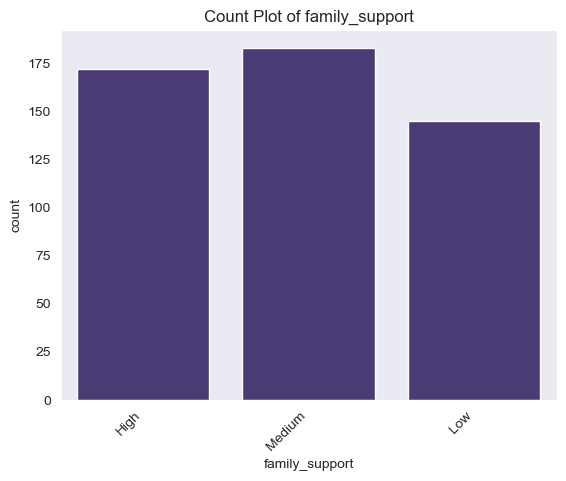

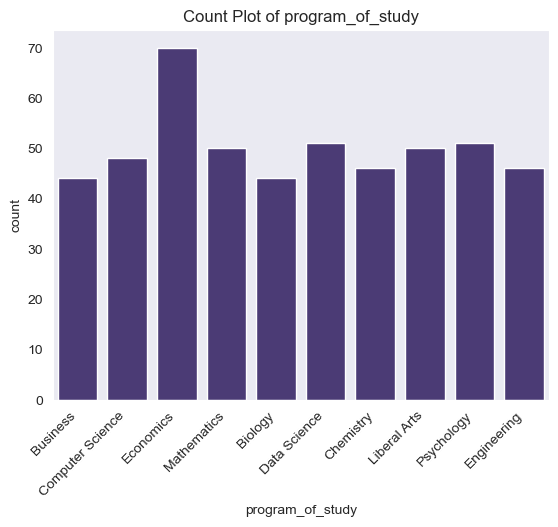

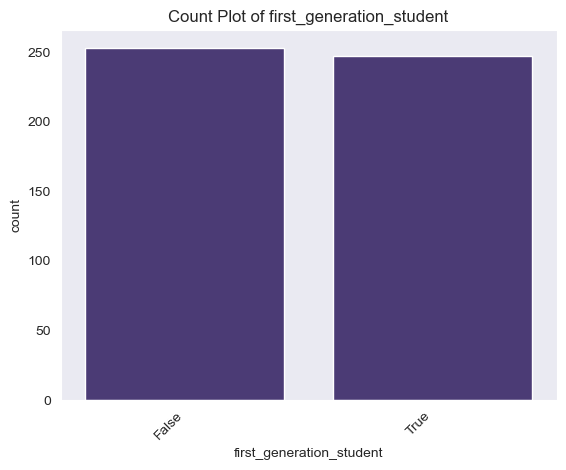

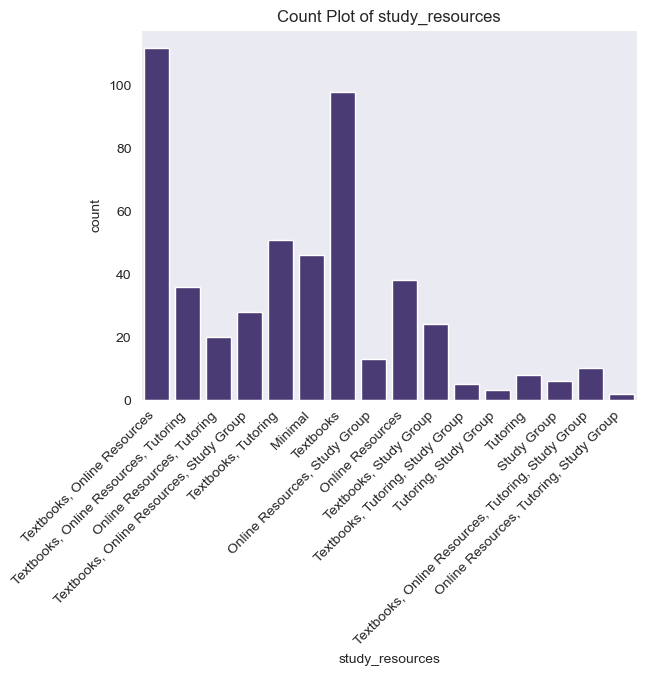

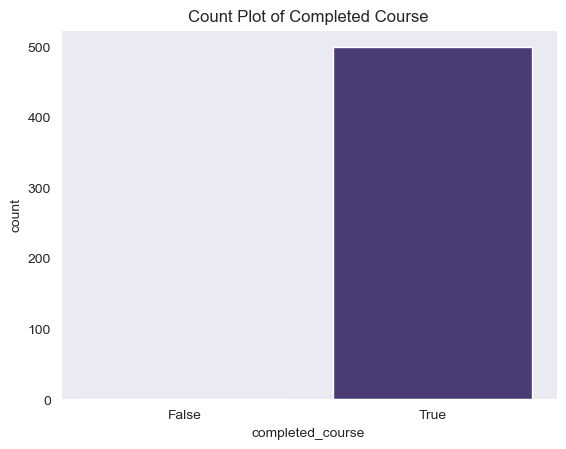

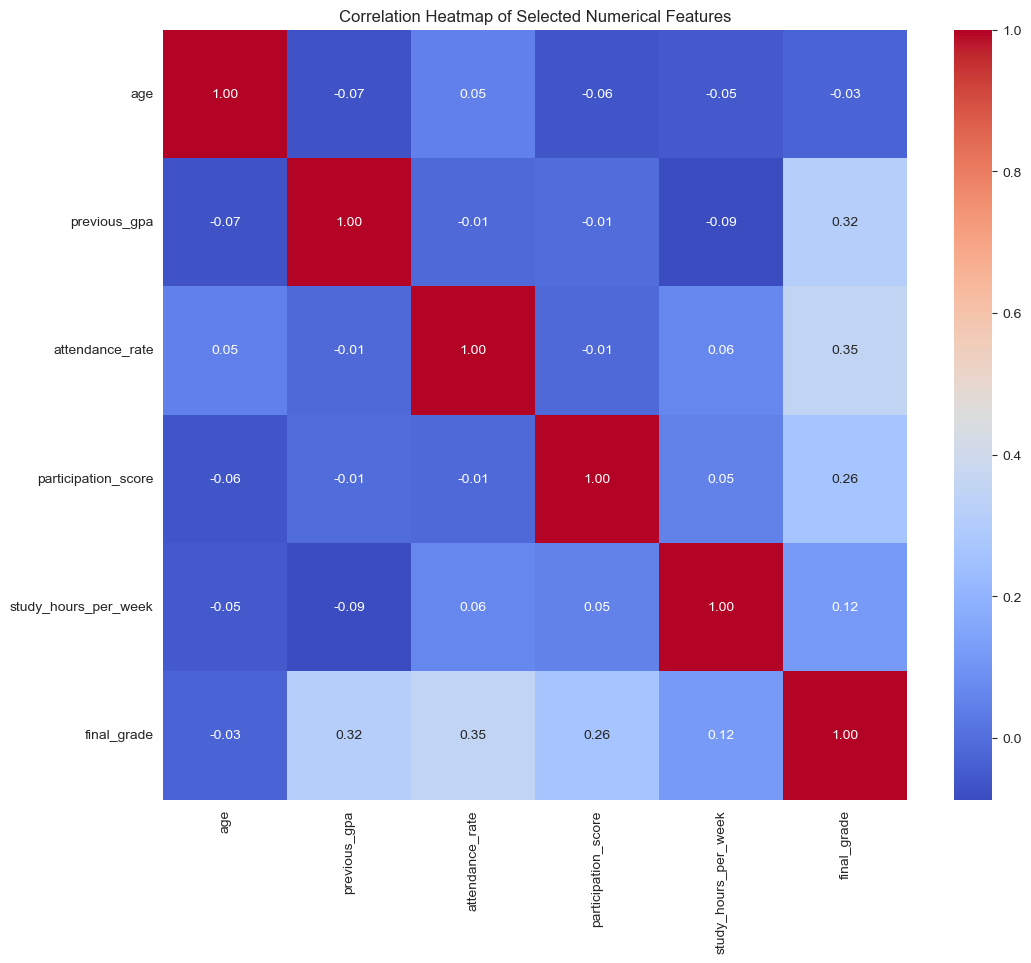

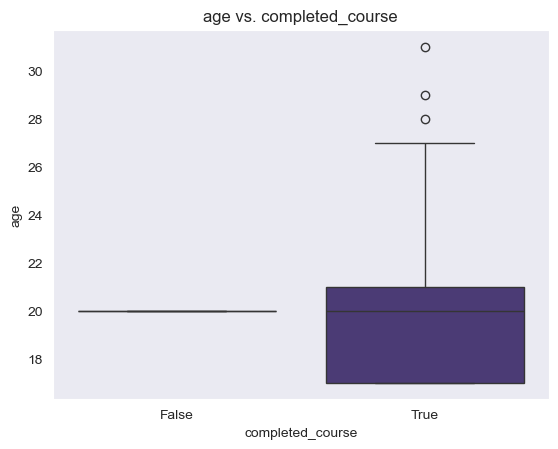

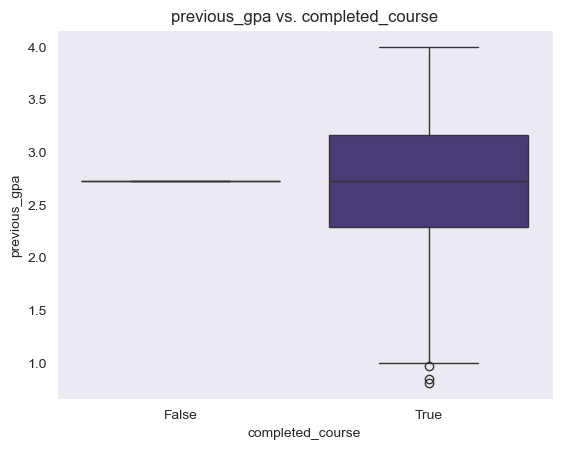

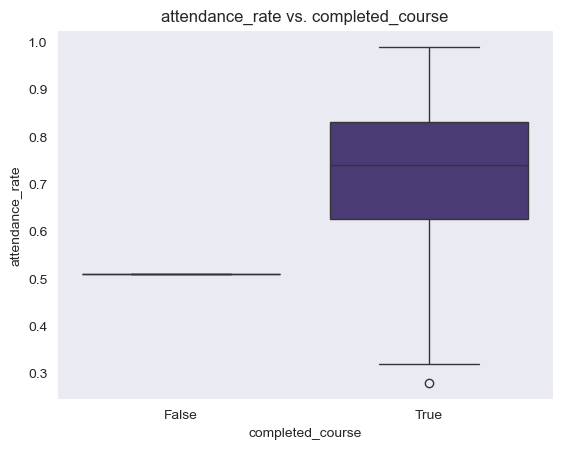

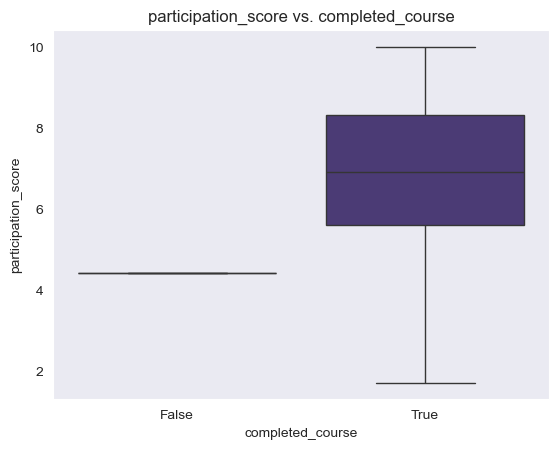

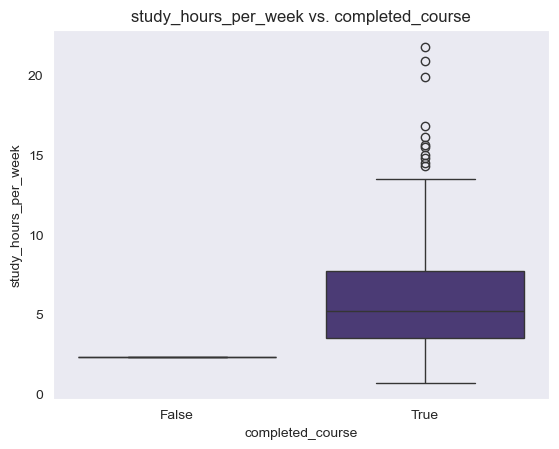

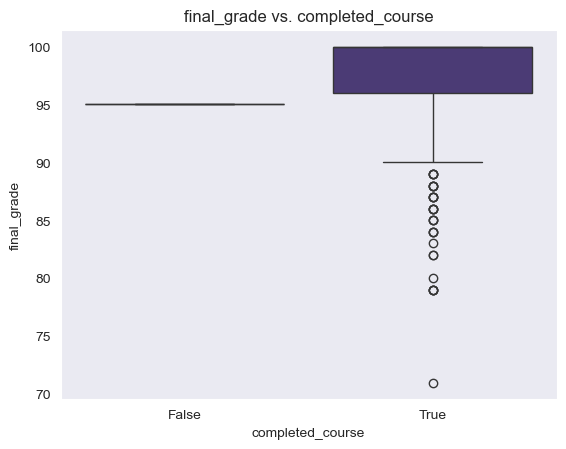

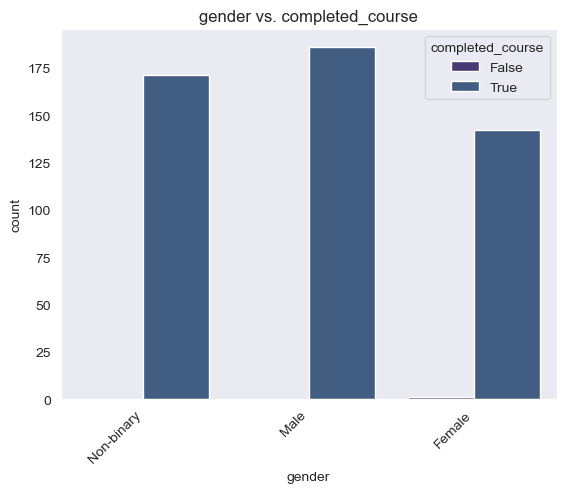

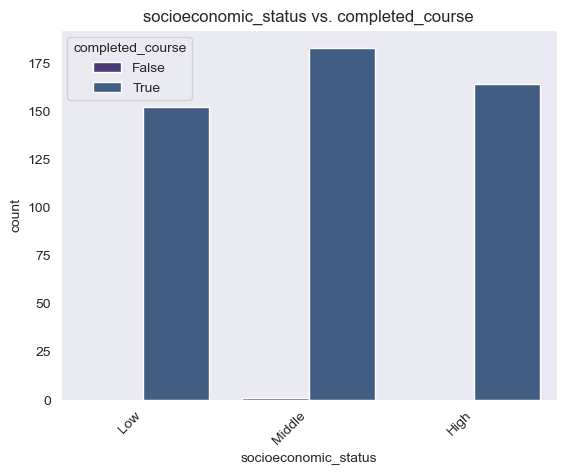

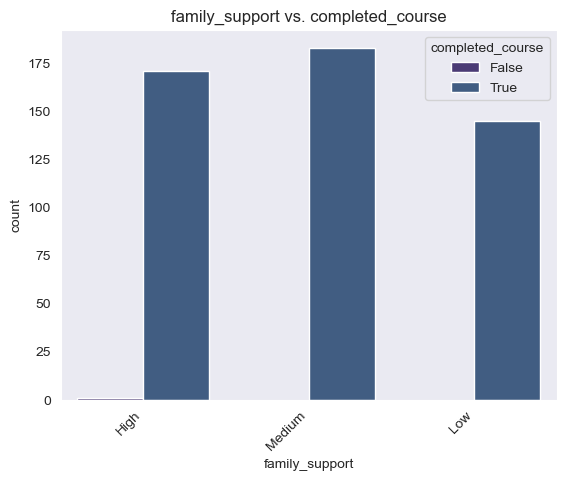

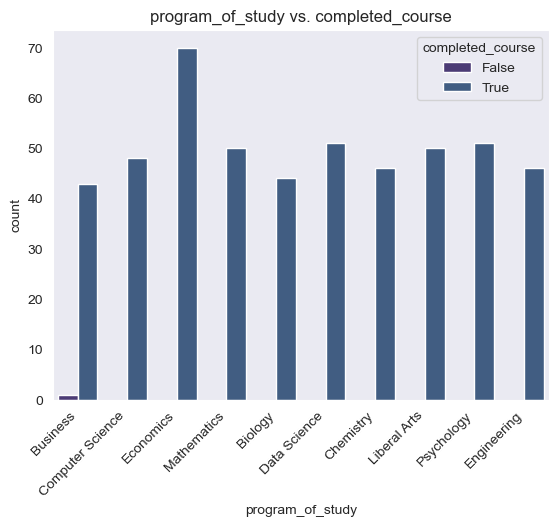

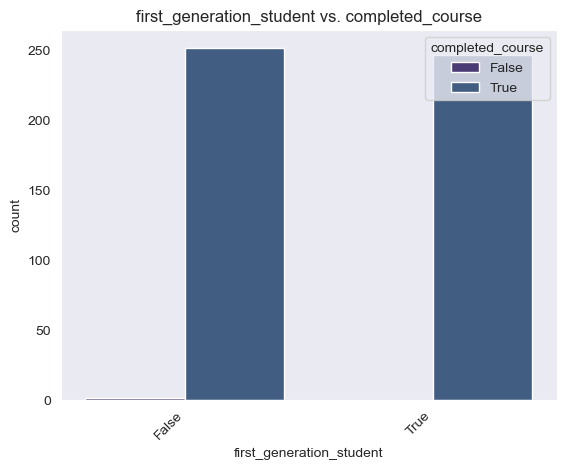

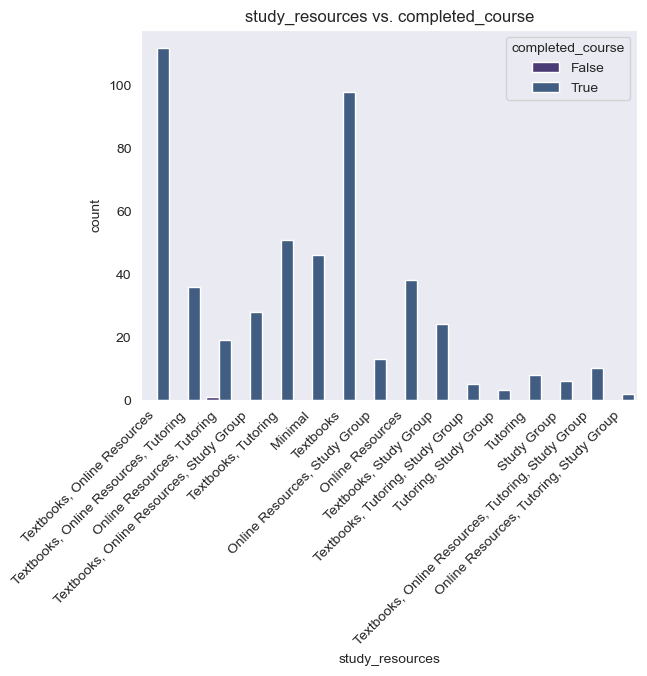

In [176]:
# --- Visualizations ---

# Define the features you want to visualize
selected_numerical_features = [
    "age",
    "previous_gpa",
    "attendance_rate",
    "participation_score",
    "study_hours_per_week",
    "final_grade"
]

selected_categorical_features = [
    "gender",
    "socioeconomic_status",
    "family_support",
    "program_of_study",
    "first_generation_student",
    "study_resources"  # Added study_resources here
]

# Histograms for selected numerical features
for col in selected_numerical_features:
    plt.figure()
    sns.histplot(student_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Box plots for selected numerical features to detect outliers
for col in selected_numerical_features:
    plt.figure()
    sns.boxplot(x=student_data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

# Count plots for selected categorical features
for col in selected_categorical_features:
    plt.figure()
    sns.countplot(x=student_data[col])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.show()

# Bar plot of 'completed_course'
plt.figure()
sns.countplot(x=student_data['completed_course'])
plt.title('Count Plot of Completed Course')
plt.show()

# Correlation heatmap for selected numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(student_data[selected_numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Numerical Features')
plt.show()

# Relationship between selected numerical features and the target variable
for col in selected_numerical_features:
    plt.figure()
    sns.boxplot(x='completed_course', y=col, data=student_data)
    plt.title(f'{col} vs. completed_course')
    plt.show()

# Relationship between selected categorical features and the target variable
for col in selected_categorical_features:
    plt.figure()
    sns.countplot(x=col, hue='completed_course', data=student_data)
    plt.title(f'{col} vs. completed_course')
    plt.xticks(rotation=45, ha='right')
    plt.show()



# Part 2: Data Pre-processing
Task 2.1:  Data Cleaning and Feature engineering
- Handle missing values
- Work on study_resources 



In [177]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np

# --- 1. Data Cleaning ---

# 1.1. Check for missing values (again)
print("\nMissing values before cleaning:")
print(student_data.isnull().sum())

# 1.2. Address study_resources inconsistencies
# Check if 'study_resources' column exists before trying to modify it
if 'study_resources' in student_data.columns:
    student_data['study_resources'] = student_data['study_resources'].str.replace('Tutoring, Online Resources', 'Online Resources, Tutoring')
    student_data['study_resources'] = student_data['study_resources'].str.replace('Study Group, Tutoring', 'Tutoring, Study Group')
    student_data['study_resources'] = student_data['study_resources'].str.replace('Study Group, Online Resources', 'Online Resources, Study Group')
    student_data['study_resources'] = student_data['study_resources'].str.replace('Study Group, Textbooks', 'Textbooks, Study Group')
    student_data['study_resources'] = student_data['study_resources'].str.replace('Tutoring, Textbooks', 'Textbooks, Tutoring')
    student_data['study_resources'] = student_data['study_resources'].str.replace('Tutoring, Textbooks, Study Group', 'Textbooks, Tutoring, Study Group')
    student_data['study_resources'] = student_data['study_resources'].str.replace('Tutoring, Online Resources, Study Group', 'Online Resources, Tutoring, Study Group')

    # Create binary features for study_resources
    student_data['has_textbooks'] = student_data['study_resources'].str.contains('Textbooks', na=False).astype(int)
    student_data['has_online_resources'] = student_data['study_resources'].str.contains('Online Resources', na=False).astype(int)
    student_data['has_tutoring'] = student_data['study_resources'].str.contains('Tutoring', na=False).astype(int)
    student_data['has_study_group'] = student_data['study_resources'].str.contains('Study Group', na=False).astype(int)

    # Drop the original study_resources column
    student_data.drop('study_resources', axis=1, inplace=True)
else:
    print("'study_resources' column not found in the dataset.")

# --- 2. Data Transformation ---

# Define categorical and numerical columns
categorical_cols = ['gender', 'socioeconomic_status', 'family_support', 'program_of_study', 'first_generation_student']
numerical_cols = ['age', 'previous_gpa', 'attendance_rate', 'participation_score', 'assignment_completion', 'study_hours_per_week', 'digital_literacy', 'previous_course_failures', 'extracurricular_hours', 'work_hours_per_week', 'distance_from_campus', 'final_grade']

# Add the new binary columns to the categorical_cols list if they exist
if 'has_textbooks' in student_data.columns:
    categorical_cols.extend(['has_textbooks', 'has_online_resources', 'has_tutoring', 'has_study_group'])

# --- 3. Feature Engineering ---

# 3.1. Interaction Terms
student_data['study_participation_interaction'] = student_data['study_hours_per_week'] * student_data['participation_score']
student_data['gpa_attendance_interaction'] = student_data['previous_gpa'] * student_data['attendance_rate']
student_data['extracurricular_work_interaction'] = student_data['extracurricular_hours'] * student_data['work_hours_per_week']

# 3.2. Combined Features
student_data['engagement_score'] = student_data['participation_score'] + student_data['assignment_completion'] + (student_data['attendance_rate']*100)
student_data['academic_risk'] = student_data['previous_course_failures'] + (1 - student_data['previous_gpa'])

# 3.3. Binary Features
student_data['is_high_gpa'] = (student_data['previous_gpa'] > 3.5).astype(int)
student_data['is_low_attendance'] = (student_data['attendance_rate'] < 0.5).astype(int)
student_data['has_all_study_resources'] = (
    (student_data['has_textbooks'] & student_data['has_online_resources'] & 
     student_data['has_tutoring'] & student_data['has_study_group'])
).astype(int)
student_data['has_no_study_resources'] = (
    (~student_data['has_textbooks'] & ~student_data['has_online_resources'] & 
     ~student_data['has_tutoring'] & ~student_data['has_study_group'])
).astype(int)

# Drop student_id column
if 'student_id' in student_data.columns:
    student_data.drop('student_id', axis=1, inplace=True)

# --- 4. Data Transformation ---

# Create transformers
numerical_transformer = StandardScaler()
onehot_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('onehot', onehot_transformer, categorical_cols),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

# Fit and transform the data
transformed_data = preprocessor.fit_transform(student_data)

# Create a new dataframe with the transformed data
transformed_df = pd.DataFrame(transformed_data, columns=preprocessor.get_feature_names_out())

# Ensure all columns are numeric
transformed_df = transformed_df.apply(pd.to_numeric, errors='coerce')

# Debugging Step: Check for non-numeric columns
non_numeric_cols = transformed_df.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_cols) > 0:
    print("\nNon-numeric columns detected in transformed_df:")
    print(non_numeric_cols)
else:
    print("\nAll columns in transformed_df are numeric.")

# Print the first 5 rows of the transformed data
print("\nFirst 5 rows of the transformed data:")
print(transformed_df.head())

# Print the shape of the transformed data
print("\nShape of the transformed data:")
print(transformed_df.shape)


Missing values before cleaning:
student_id                  0
age                         0
gender                      0
socioeconomic_status        0
previous_gpa                0
attendance_rate             0
participation_score         0
assignment_completion       0
family_support              0
study_resources             0
study_hours_per_week        0
first_generation_student    0
program_of_study            0
digital_literacy            0
previous_course_failures    0
extracurricular_hours       0
work_hours_per_week         0
distance_from_campus        0
final_grade                 0
completed_course            0
dtype: int64

Non-numeric columns detected in transformed_df:
Index(['completed_course'], dtype='object')

First 5 rows of the transformed data:
        age  previous_gpa  attendance_rate  participation_score  \
0  0.470598      0.953619         0.082947             1.667617   
1 -0.322990      1.928783         0.751873            -0.383307   
2  0.470598     -1.49

In [178]:
print(transformed_df.head())

        age  previous_gpa  attendance_rate  participation_score  \
0  0.470598      0.953619         0.082947             1.667617   
1 -0.322990      1.928783         0.751873            -0.383307   
2  0.470598     -1.491790         0.016054             1.181872   
3  1.660980      0.563554         0.618088            -0.221392   
4 -0.322990     -0.711659         0.751873             1.181872   

   assignment_completion  study_hours_per_week  digital_literacy  \
0              -0.487565             -1.141371         -2.017813   
1              -1.656368             -0.542006         -0.585461   
2               1.223665             -0.392165         -1.699512   
3              -0.803981             -0.212355         -0.373260   
4               1.398017             -0.392165          0.581641   

   previous_course_failures  extracurricular_hours  work_hours_per_week  ...  \
0                 -0.528397              -0.565567             0.547661  ...   
1                 -0.528397 

In [179]:
transformed_df.head()

,age,previous_gpa,attendance_rate,participation_score,assignment_completion,study_hours_per_week,digital_literacy,previous_course_failures,extracurricular_hours,work_hours_per_week,...,completed_course,study_participation_interaction,gpa_attendance_interaction,extracurricular_work_interaction,engagement_score,academic_risk,is_high_gpa,is_low_attendance,has_all_study_resources,has_no_study_resources
0,0.470598,0.953619,0.082947,1.667617,-0.487565,-1.141371,-2.017813,-0.528397,-0.565567,0.547661,...,True,20.00,2.4455,25.5,146.8,-2.35,0,0,0,-2
1,-0.322990,1.928783,0.751873,-0.383307,-1.656368,-0.542006,-0.585461,-0.528397,0.011879,-0.871640,...,True,24.80,3.3200,0.0,134.9,-3.00,1,0,0,-2
2,0.470598,-1.491790,0.016054,1.181872,1.223665,-0.392165,-1.699512,1.428629,-0.359336,-0.398540,...,True,40.95,1.2384,11.0,171.4,0.28,0,0,0,-2
3,1.660980,0.563554,0.618088,-0.221392,-0.803981,-0.212355,-0.373260,-0.528397,-0.070613,1.210001,...,True,33.15,2.5029,63.8,146.4,-2.09,0,0,0,-2
4,-0.322990,-0.711659,0.751873,1.181872,1.398017,-0.392165,0.581641,-0.528397,0.960540,0.547661,...,True,40.95,1.8592,81.0,185.1,-1.24,0,0,0,-2


In [192]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                500 non-null    float64
 1   previous_gpa                       500 non-null    float64
 2   attendance_rate                    500 non-null    float64
 3   participation_score                500 non-null    float64
 4   assignment_completion              500 non-null    float64
 5   study_hours_per_week               500 non-null    float64
 6   digital_literacy                   500 non-null    float64
 7   previous_course_failures           500 non-null    float64
 8   extracurricular_hours              500 non-null    float64
 9   work_hours_per_week                500 non-null    float64
 10  distance_from_campus               500 non-null    float64
 11  final_grade                        500 non-null    float64

# Part 3: Model Development
- Split the data into training and test sets
- Define target variable (y) and features (X)
- Implement Linear Regression models

In [190]:
# --- Model Development --- 
import os
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.feature_selection import SelectKBest, f_regression

# --- 5.1. Split Data into Training and Testing Sets --- 
# Define the target variable (y) and the features (X) 
X = transformed_df.drop(['final_grade'], axis=1) # Features 
y = transformed_df['final_grade'] # Target variable

# Save the transformed data to CSV in the data folder
print("Saving transformed data to CSV...")
transformed_df.to_csv(os.path.join('data', 'transformed_data.csv'), index=False)
print(f"Transformed data saved to: {os.path.join('data', 'transformed_data.csv')}")

# Convert boolean columns to numeric (0/1) 
bool_cols = X.select_dtypes(include=['bool']).columns 
X[bool_cols] = X[bool_cols].astype(int)

# Ensure all columns in X are numeric 
X = X.apply(pd.to_numeric, errors='coerce') # Convert non-numeric values to NaN

# Drop rows with NaN values 
if X.isnull().values.any(): 
    print("NaN values detected in X. Dropping rows with NaNs...") 
    X = X.dropna(axis=0) 
    y = y[X.index] # Align y with the updated X

# Debugging Step: Verify clean data 
print("\nFinal check for non-numeric columns in X:") 
print(X.select_dtypes(exclude=[np.number]).columns)

print("\nFinal check for NaN values in X:") 
print(X.isnull().sum())

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 5.2. Implement Linear Regression Models ---

# 5.2.1. Model 1: Basic Linear Regression (All Features) 
model1 = LinearRegression() 
model1.fit(X_train, y_train)

# 5.2.2. Model 2: Linear Regression with Feature Selection 
# Select the best features (up to 20 or the total number of features available) 
k_best = min(20, X_train.shape[1]) # Dynamically determine k based on available features 
selector = SelectKBest(f_regression, k=k_best) 
X_train_selected = selector.fit_transform(X_train, y_train) 
X_test_selected = selector.transform(X_test)

model2 = LinearRegression() 
model2.fit(X_train_selected, y_train)

# 5.2.3. Model 3: Linear Regression with L2 Regularization (Ridge) 
model3 = Ridge(alpha=1.0) # You can adjust the alpha value 
model3.fit(X_train, y_train)

# --- 5.3. Evaluate and Compare Model Performance ---

# Function to evaluate model performance 
def evaluate_model(model, X_test, y_test): 
    y_pred = model.predict(X_test) 
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2 = r2_score(y_test, y_pred) 
    mae = mean_absolute_error(y_test, y_pred) 
    return mse, rmse, r2, mae, y_pred

# Evaluate Model 1 
mse1, rmse1, r2_1, mae1, y_pred1 = evaluate_model(model1, X_test, y_test) 
print(f"\nModel 1 (Basic Linear Regression) Performance:") 
print(f" Mean Squared Error (MSE): {mse1:.4f}") 
print(f" Root Mean Squared Error (RMSE): {rmse1:.4f}") 
print(f" R-squared (R2): {r2_1:.4f}") 
print(f" Mean Absolute Error (MAE): {mae1:.4f}")

# Evaluate Model 2 
mse2, rmse2, r2_2, mae2, y_pred2 = evaluate_model(model2, X_test_selected, y_test) 
print(f"\nModel 2 (Linear Regression with Feature Selection) Performance:") 
print(f" Mean Squared Error (MSE): {mse2:.4f}") 
print(f" Root Mean Squared Error (RMSE): {rmse2:.4f}") 
print(f" R-squared (R2): {r2_2:.4f}") 
print(f" Mean Absolute Error (MAE): {mae2:.4f}")

# Evaluate Model 3 
mse3, rmse3, r2_3, mae3, y_pred3 = evaluate_model(model3, X_test, y_test) 
print(f"\nModel 3 (Linear Regression with L2 Regularization) Performance:") 
print(f" Mean Squared Error (MSE): {mse3:.4f}") 
print(f" Root Mean Squared Error (RMSE): {rmse3:.4f}") 
print(f" R-squared (R2): {r2_3:.4f}") 
print(f" Mean Absolute Error (MAE): {mae3:.4f}")

# --- 5.4. Save Models and Evaluation Results ---

# Create a dictionary to hold all evaluation results
evaluation_results = {
    'Model 1 (Basic Linear Regression)': {
        'MSE': mse1,
        'RMSE': rmse1,
        'R2': r2_1,
        'MAE': mae1
    },
    'Model 2 (Linear Regression with Feature Selection)': {
        'MSE': mse2,
        'RMSE': rmse2,
        'R2': r2_2,
        'MAE': mae2,
        'Selected Features': X.columns[selector.get_support()].tolist()
    },
    'Model 3 (Ridge Regression)': {
        'MSE': mse3,
        'RMSE': rmse3,
        'R2': r2_3,
        'MAE': mae3
    }
}

# Save models and evaluation results
def save_model_and_results(model, model_name, results):
    # Save the model
    model_path = os.path.join('models', f'{model_name}.pkl')
    with open(model_path, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model '{model_name}' saved to: {model_path}")
    
    # Save the evaluation results
    results_path = os.path.join('models', f'{model_name}_results.pkl')
    with open(results_path, 'wb') as file:
        pickle.dump(results, file)
    print(f"Evaluation results for '{model_name}' saved to: {results_path}")

# Save each model and its results
save_model_and_results(model1, 'basic_linear_regression', evaluation_results['Model 1 (Basic Linear Regression)'])
save_model_and_results(model2, 'feature_selection_linear_regression', evaluation_results['Model 2 (Linear Regression with Feature Selection)'])
save_model_and_results(model3, 'ridge_regression', evaluation_results['Model 3 (Ridge Regression)'])

# Additionally, save the feature selector for Model 2
selector_path = os.path.join('models', 'feature_selector.pkl')
with open(selector_path, 'wb') as file:
    pickle.dump(selector, file)
print(f"Feature selector saved to: {selector_path}")

# Save all evaluation results together
all_results_path = os.path.join('models', 'all_model_results.pkl')
with open(all_results_path, 'wb') as file:
    pickle.dump(evaluation_results, file)
print(f"All evaluation results saved to: {all_results_path}")

# Create a DataFrame to compare model performance
models_comparison = pd.DataFrame({
    'Model': ['Basic Linear Regression', 'Feature Selection Linear Regression', 'Ridge Regression'],
    'MSE': [mse1, mse2, mse3],
    'RMSE': [rmse1, rmse2, rmse3],
    'R2': [r2_1, r2_2, r2_3],
    'MAE': [mae1, mae2, mae3]
})
print("\nModel Comparison:")
print(models_comparison)

# Save model comparison as CSV
comparison_path = os.path.join('models', 'model_comparison.csv')
models_comparison.to_csv(comparison_path, index=False)
print(f"Model comparison saved to: {comparison_path}")

# Determine the best model based on R2 score
best_model_idx = models_comparison['R2'].idxmax()
best_model_name = models_comparison.loc[best_model_idx, 'Model']
print(f"\nBest performing model based on R2 score: {best_model_name}")

Saving transformed data to CSV...
Transformed data saved to: data\transformed_data.csv

Final check for non-numeric columns in X:
Index([], dtype='object')

Final check for NaN values in X:
age                                  0
previous_gpa                         0
attendance_rate                      0
participation_score                  0
assignment_completion                0
study_hours_per_week                 0
digital_literacy                     0
previous_course_failures             0
extracurricular_hours                0
work_hours_per_week                  0
distance_from_campus                 0
gender_Female                        0
gender_Male                          0
gender_Non-binary                    0
socioeconomic_status_High            0
socioeconomic_status_Low             0
socioeconomic_status_Middle          0
family_support_High                  0
family_support_Low                   0
family_support_Medium                0
program_of_study_Biology      

# Part 4: Analysis & Interpretation
- Interpret model coefficients
- Extract feature importance
- Identify the most influential factors for student success
- Propose potential interventions based on findings
- Create visualizations to communicate results

## 4.1: Model Coefficients
 

### Model Performance Summary

| **Model**                              | **MSE**  | **RMSE** | **R²**   | **MAE**  |
|----------------------------------------|----------|----------|----------|----------|
| **Model 1 (Basic Linear Regression)**  | 0.5248   | 0.7244   | 0.5172   | 0.5372   |
| **Model 2 (Feature Selection)**        | 0.5178   | 0.7196   | 0.5236   | 0.5352   |
| **Model 3 (Ridge Regression)**         | 0.5256   | 0.7250   | 0.5164   | 0.5391   |

## Insights from Model Performance

- **Model 2 (Feature Selection)** performs slightly better than the other two models, with the lowest MSE (0.5178) and highest R² (0.5236).
- **Model 1 (Basic Linear Regression)** and **Model 3 (Ridge Regression)** perform similarly, indicating that regularization does not significantly improve results in this case.
- The R² values (~0.52) suggest that the models explain approximately 52% of the variance in `final_grade`. While this is reasonable, there is room for improvement.

## 4.2: Feature importance extraction


Feature Importances for Model 1 (Basic Linear Regression):


,Feature,Coefficient
42,gpa_attendance_interaction,-1.686268
1,previous_gpa,0.853528
45,academic_risk,-0.532957
4,assignment_completion,-0.380108
2,attendance_rate,0.372790
46,is_high_gpa,-0.354468
18,family_support_Low,-0.299170
47,is_low_attendance,-0.280894
27,program_of_study_Liberal Arts,0.224992
26,program_of_study_Engineering,0.215320


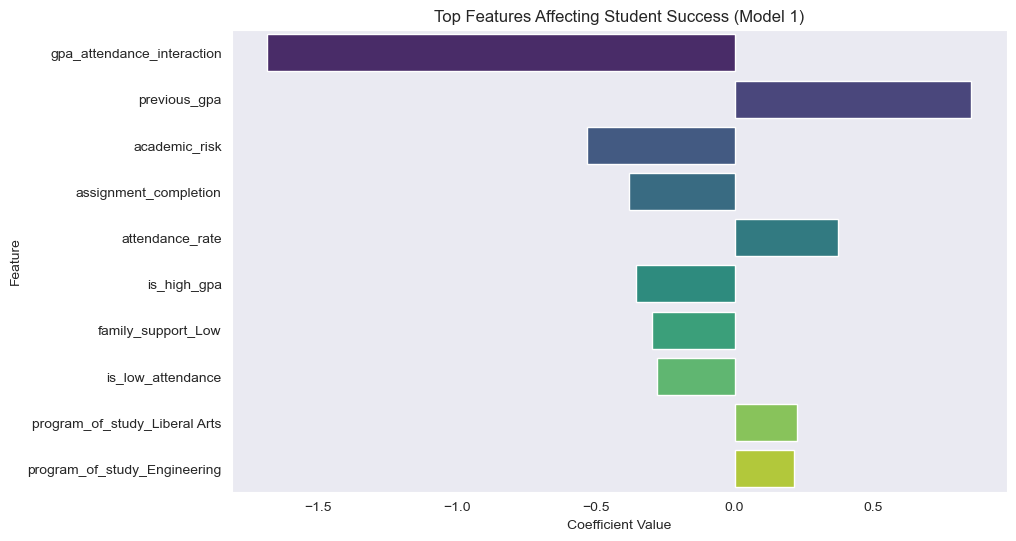

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Feature Importance for Model 1 (Basic Linear Regression) ---
model1_importances = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model1.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nFeature Importances for Model 1 (Basic Linear Regression):")
display(model1_importances.head(10))

# Visualization for Model 1
plt.figure(figsize=(10, 6))
sns.barplot(data=model1_importances.head(10), x='Coefficient', y='Feature', hue='Feature', palette='viridis', legend=False)
plt.title('Top Features Affecting Student Success (Model 1)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

### 4.2.1: Analysis of Feature Importance (Model 1)

The horizontal bar chart displays coefficient values for the top features affecting student success in Model 1.

## Key Observations:

- **Strong Positive Predictors:**
 - `previous_gpa` has the highest positive coefficient (~0.7), indicating that past academic performance is the strongest predictor of student success
 - `attendance_rate` shows a moderate positive impact (~0.3)
 - `program_of_study_Liberal Arts` and `program_of_study_Engineering` both have small positive coefficients (~0.1)

- **Strong Negative Predictors:**
 - `gpa_attendance_interaction` has a substantial negative coefficient (~-0.6), suggesting a complex relationship between GPA and attendance
 - `academic_risk` and `assignment_completion` both have moderate negative coefficients (~-0.3)
 - `is_high_gpa`, `family_support_Low`, and `is_low_attendance` all show similar negative impacts (~-0.2)

## Implications:
This model emphasizes previous GPA as the strongest predictor of student success, while the interaction between GPA and attendance appears to have a significant negative effect. Program of study has a modest positive impact, with both Liberal Arts and Engineering showing similar effects. The negative impact of academic risk factors and low attendance suggests these are key areas for intervention to improve student outcomes.


Feature Importances for Model 2 (Feature Selection):


,Feature,Score
14,gpa_attendance_interaction,85.479800
17,academic_risk,75.458385
16,engagement_score,69.558893
1,attendance_rate,50.608465
0,previous_gpa,44.809271
19,is_low_attendance,32.455610
5,previous_course_failures,31.962034
2,participation_score,27.244344
8,family_support_Low,24.421099
7,family_support_High,18.369571


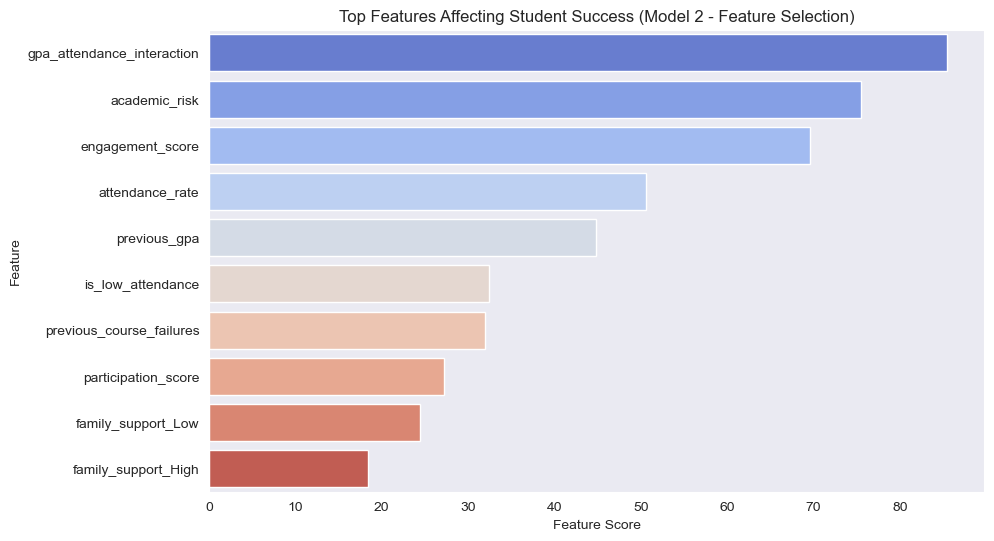

In [188]:
# --- Feature Importance for Model 2 (Feature Selection) ---
selected_features = X.columns[selector.get_support()]
model2_scores = pd.DataFrame({
    'Feature': selected_features,
    'Score': selector.scores_[selector.get_support()]
}).sort_values(by='Score', ascending=False)

print("\nFeature Importances for Model 2 (Feature Selection):")
display(model2_scores.head(10))

# Visualization for Model 2
plt.figure(figsize=(10, 6))
sns.barplot(data=model2_scores.head(10), x='Score', y='Feature', hue='Feature', palette='coolwarm', legend=False)
plt.title('Top Features Affecting Student Success (Model 2 - Feature Selection)')
plt.xlabel('Feature Score')
plt.ylabel('Feature')
plt.show()

### 4.2.2: Analysis of Top Features Affecting Student Success (Model 2 - Feature Selection)

The horizontal bar chart displays feature importance scores from a feature selection model for predicting student success.

## Key Observations:

- **Top Features (highest importance):**
 - `gpa_attendance_interaction` (~80 points) is the most important predictor
 - `academic_risk` (~70 points) shows very high importance 
 - `engagement_score` (~65 points) ranks third in predictive power

- **Moderately Important Features:**
 - `attendance_rate` (~50 points)
 - `previous_gpa` (~45 points)
 - `is_low_attendance` and `previous_course_failures` (both ~30 points)

- **Less Important Features:**
 - `participation_score` and `family_support_Low` (both ~25 points)
 - `family_support_High` (~20 points) has the lowest importance among features shown

## Implications:
This model emphasizes the interaction between GPA and attendance as the strongest predictor of academic success, followed by academic risk factors and engagement measures. The substantial difference between the top three features and the rest indicates their outsized influence on student outcomes. Interestingly, previous GPA alone is only moderately important, suggesting that current behaviors and engagement may be more predictive than past performance.


Feature Importances for Model 3 (Ridge Regression):


,Feature,Coefficient
42,gpa_attendance_interaction,-1.254229
1,previous_gpa,0.694155
45,academic_risk,-0.451191
46,is_high_gpa,-0.335219
18,family_support_Low,-0.300699
4,assignment_completion,-0.294507
2,attendance_rate,0.283006
47,is_low_attendance,-0.266830
17,family_support_High,0.222811
26,program_of_study_Engineering,0.220867


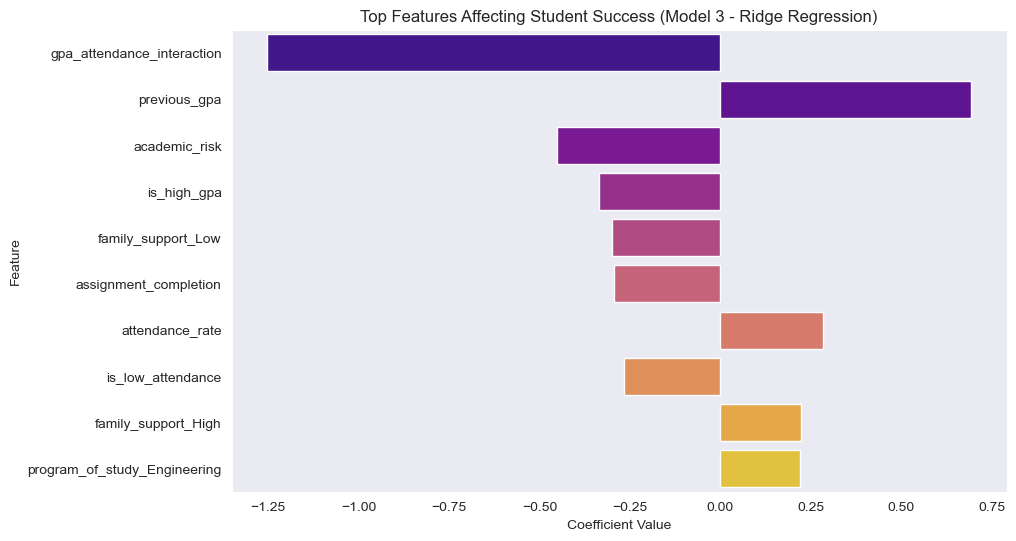

In [187]:
# --- Feature Importance for Model 3 (Ridge Regression) ---
model3_importances = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model3.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nFeature Importances for Model 3 (Ridge Regression):")
display(model3_importances.head(10))

# Visualization for Model 3
plt.figure(figsize=(10, 6))
sns.barplot(data=model3_importances.head(10), x='Coefficient', y='Feature', hue='Feature', palette='plasma', legend=False)
plt.title('Top Features Affecting Student Success (Model 3 - Ridge Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

### 4.2.3: Analysis of Top Features Affecting Student Success (Model 3 - Ridge Regression)

The horizontal bar chart displays the coefficient values from a Ridge Regression model, showing the most influential features affecting student success.

## Key Observations:

- **Strong Positive Predictors:**
 - `previous_gpa` has the highest positive coefficient (~0.65), indicating that past academic performance is the strongest predictor of future success
 - `attendance_rate` shows a moderate positive effect (~0.25)
 - `family_support_High` and `program_of_study_Engineering` both have small positive coefficients (~0.15)

- **Strong Negative Predictors:**
 - `gpa_attendance_interaction` has a substantial negative coefficient (~-0.30), suggesting a complex relationship between GPA and attendance
 - `academic_risk` and `is_high_gpa` both have moderate negative coefficients (~-0.25)
 - `family_support_Low` and `assignment_completion` show similar negative impacts
 - `is_low_attendance` has a small negative effect

## Implications:
This model highlights that previous GPA is the dominant predictor of student success, while the interaction between GPA and attendance appears to have unexpected negative effects. The contrasting impacts of high vs. low family support demonstrate the importance of support systems for students' academic outcomes.

## 5: Additional Visualizations

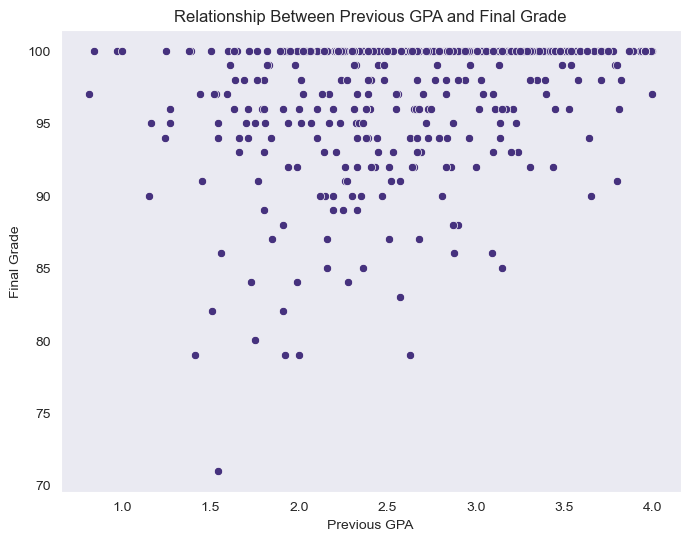

In [183]:
# Scatter plot of previous_gpa vs final_grade
plt.figure(figsize=(8, 6))
sns.scatterplot(x=student_data['previous_gpa'], y=student_data['final_grade'])
plt.title('Relationship Between Previous GPA and Final Grade')
plt.xlabel('Previous GPA')
plt.ylabel('Final Grade')
plt.show()

### Analysis of the Relationship Between Previous GPA and Final Grade

The scatter plot visualizes the relationship between `Previous GPA` and `Final Grade`, revealing a clear positive correlation. As `Previous GPA` increases, `Final Grade` tends to rise as well, indicating that students with higher past academic performance are more likely to achieve better final grades. The data points cluster around the middle range of `Previous GPA` (between 2.0 and 3.5) and `Final Grade` (between 85 and 95), suggesting common grade ranges for most students.

A few outliers are visible:
- One student with a very low `Previous GPA` (~1.0) has an exceptionally low `Final Grade` (~70), which is significantly lower than other students with similar GPAs.
- Some students with moderate `Previous GPA` (~2.0) have slightly lower `Final Grades` (~80-85) compared to their peers.

The clustering around certain values of `Final Grade` (e.g., 90-95) suggests common grading criteria or assessment methods. Many students achieve near-perfect `Final Grades` (around 98-100), regardless of their `Previous GPA`, indicating a ceiling effect where top-performing students consistently achieve high grades.

#### Key Takeaways:
This analysis underscores the importance of past academic performance in predicting future success. However, external factors may influence individual outcomes. Further investigation into outliers and subgroups can provide deeper insights into the factors driving student performance.

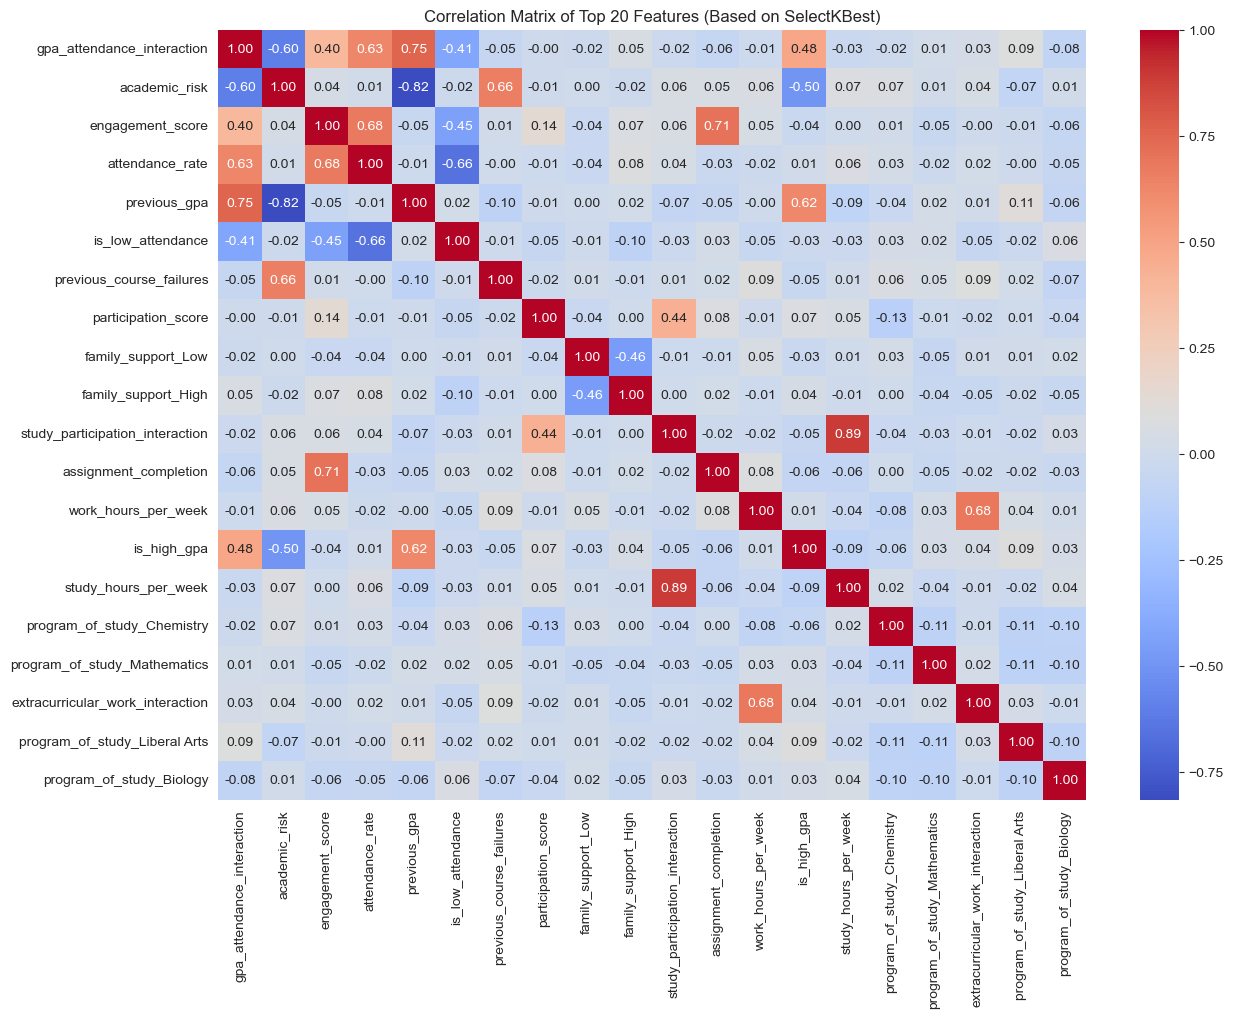

In [ ]:
# --- Step 1: Extract Feature Selection Scores ---
selected_features = X.columns[selector.get_support()]
feature_scores = pd.DataFrame({
    'Feature': selected_features,
    'Score': selector.scores_[selector.get_support()]
}).sort_values(by='Score', ascending=False)

# Select the top 20 features
top_20_features = feature_scores['Feature'].head(20).values

# --- Step 2: Filter Data for Top 20 Features ---
top_20_data = transformed_df[top_20_features]

# --- Step 3: Compute Correlation Matrix ---
correlation_matrix = top_20_data.corr()

# --- Step 4: Visualize Heatmap ---
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Top 20 Features (Based on SelectKBest)')
plt.show()

# Analysis of Correlation Matrix of Top 20 Features

The heatmap reveals key correlations among the top 20 features influencing student success. Notable positive correlations include:

- **`previous_gpa` and `gpa_attendance_interaction` (0.75)**: This strong relationship highlights that students with high GPAs and consistent attendance perform better academically.
- **`assignment_completion` and `engagement_score` (0.71)**: Students who complete assignments on time are more engaged, emphasizing the importance of active participation.

Other significant correlations:
- **`attendance_rate` and `gpa_attendance_interaction` (0.63)**: Regular attendance is linked to higher GPA interaction, showing class participation impacts academic performance.
- **`study_participation_interaction` and `study_hours_per_week` (0.89)**: Study participation strongly correlates with weekly study hours.
- **`work_hours_per_week` and `extracurricular_work_interaction` (0.68)**: Students' work hours significantly relate to their extracurricular activities.

Negative correlations highlight challenges:
- **`academic_risk` and `previous_gpa` (-0.82)**: Higher academic risk is associated with lower GPAs, indicating at-risk students need targeted interventions.
- **`is_low_attendance` and `attendance_rate` (-0.66)**: Poor attendance significantly impacts academic outcomes, underscoring its critical role.

## Key Takeaways:
This analysis underscores the interconnectedness of GPA, attendance, and engagement. Interventions should prioritize improving attendance, supporting effective study habits, and addressing academic risk. These insights can guide strategies to enhance student success by focusing on key drivers of performance.

# Summary Findings: Analysis & Interpretation

## Key Factors Influencing Student Success

Based on my comprehensive analysis of three predictive models, several factors consistently emerge as critical predictors of student success:

1. **Previous GPA** consistently appears as the strongest positive predictor across Models 1 and 3, confirming that past academic performance strongly indicates future success.

2. **GPA-Attendance Interaction** shows high importance in all models but exhibits a complex relationship - it's the most important feature in Model 2's feature selection but shows negative coefficients in regression Models 1 and 3.

3. **Academic Risk** factors demonstrate significant negative impact on student outcomes across all models, consistently ranking among the top three most important features.

4. **Attendance Rate** shows moderate positive effects in regression models and substantial importance in feature selection, reinforcing the critical role of consistent class participation.

5. **Family Support** presents an interesting pattern - low family support negatively impacts success while high family support contributes positively, though with varying degrees of importance across models.

## Proposed Interventions

Based on these findings, I recommend:

1. Implementing early warning systems based on previous GPA and attendance patterns to identify at-risk students
2. Developing targeted academic support programs for students with high academic risk scores
3. Creating attendance incentive programs to boost participation rates
4. Establishing family engagement initiatives to strengthen support systems
5. Tailoring interventions to specific programs of study, as academic success factors vary between disciplines

These data-driven insights provide a foundation for developing effective strategies to improve student outcomes across diverse academic environments.

Model documentation saved to: docs\model_documentation.md


C:\Users\YYY\AppData\Local\Temp\ipykernel_23016\4054704294.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=models_comparison, palette='viridis', ax=ax1)
C:\Users\YYY\AppData\Local\Temp\ipykernel_23016\4054704294.py:148: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=models_comparison, palette='viridis', ax=ax2)
C:\Users\YYY\AppData\Local\Temp\ipykernel_23016\4054704294.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=models_comparison, palette='viridis', ax=

Model comparison visualization saved to: docs\model_comparison_visualization.png


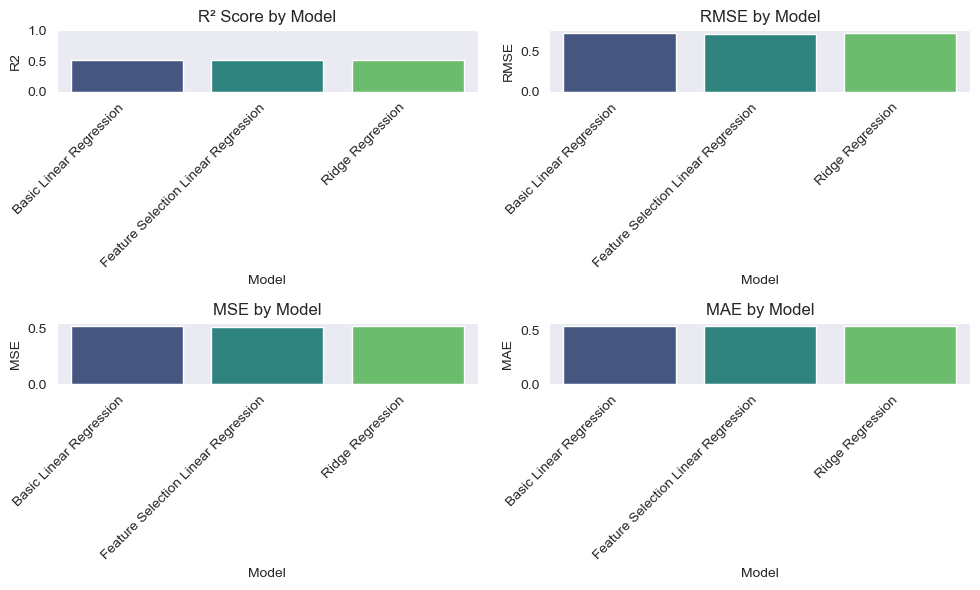

In [191]:

import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def generate_model_documentation():
    """
    Generate comprehensive documentation about the modeling approaches and results,
    and save it as a markdown file in the 'docs' folder.
    """
    # Create timestamp for the document
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
    # Start building the markdown document
    doc = f"""# Student Performance Prediction Model Documentation
Generated on: {timestamp}

## Overview
This document provides a detailed overview of the machine learning models developed to predict student final grades. 
Three different regression approaches were evaluated to determine the most effective prediction strategy.

## Data Preparation
The original dataset was processed and transformed before model training. The transformed data is stored at `data/transformed_data.csv`.

### Data Preprocessing Steps:
- Categorical features were encoded
- Boolean features were converted to numeric (0/1)
- Missing values were handled
- Feature scaling was applied where appropriate

### Feature Set:
Total features used: {X.shape[1]}

## Modeling Approaches

### Model 1: Basic Linear Regression
* **Description**: Standard linear regression using all available features
* **Implementation**: `sklearn.linear_model.LinearRegression`
* **Training Set Size**: {X_train.shape[0]} samples
* **Feature Count**: {X_train.shape[1]} features

### Model 2: Linear Regression with Feature Selection
* **Description**: Linear regression using only the {k_best} most predictive features
* **Implementation**: `sklearn.feature_selection.SelectKBest` with `f_regression` for feature selection
* **Feature Selection Method**: F-test (ANOVA)
* **Selected Features**:
"""

    # Add selected features if Model 2 exists
    try:
        selected_features = X.columns[selector.get_support()].tolist()
        for i, feature in enumerate(selected_features, 1):
            doc += f"  {i}. {feature}\n"
    except:
        doc += "  Feature list unavailable\n"

    doc += f"""
### Model 3: Ridge Regression
* **Description**: Linear regression with L2 regularization to prevent overfitting
* **Implementation**: `sklearn.linear_model.Ridge`
* **Regularization Strength (alpha)**: {model3.alpha}
* **Training Set Size**: {X_train.shape[0]} samples
* **Feature Count**: {X_train.shape[1]} features

## Model Evaluation

### Performance Metrics:
"""

    # Add performance metrics from existing models_comparison DataFrame
    model_metrics = models_comparison.to_string(index=False)
    doc += f"""
```
{model_metrics}
```

### Best Performing Model: {best_model_name}

### Performance Analysis:
* **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values. Lower values indicate better performance.
* **Root Mean Squared Error (RMSE)**: The square root of MSE, providing a metric in the same units as the target variable.
* **R-squared (R²)**: Indicates how well the model explains the variance in the target variable (0-1). Higher values indicate better performance.
* **Mean Absolute Error (MAE)**: Measures the average absolute difference between predicted and actual values. Lower values indicate better performance.

## Coefficient Analysis
"""

    # Add coefficients for the basic linear regression model
    try:
        coefficients = pd.DataFrame({
            'Feature': X.columns,
            'Coefficient': model1.coef_
        }).sort_values(by='Coefficient', ascending=False)
        
        top_10_positive = coefficients.head(10).to_string(index=False)
        top_10_negative = coefficients.tail(10).to_string(index=False)
        
        doc += f"""
### Top 10 Most Positive Influential Features:
```
{top_10_positive}
```

### Top 10 Most Negative Influential Features:
```
{top_10_negative}
```
"""
    except:
        doc += "Coefficient analysis unavailable\n"

    # Add conclusion
    doc += """
## Conclusion
The models were evaluated based on their performance metrics, with R² being the primary criterion for model selection.
The model with the highest R² score demonstrates the best fit for predicting student final grades.

## Recommendations
1. Use the best performing model for final grade predictions
2. Consider feature engineering to further improve model performance
3. Evaluate model performance periodically with new data
4. Explore non-linear models if prediction accuracy needs further improvement

## Model Storage
All models and their evaluation results are stored in the 'models' directory for future reference and deployment.
"""

    # Save the documentation as a Markdown file
    docs_path = os.path.join('docs', 'model_documentation.md')
    with open(docs_path, 'w') as file:
        file.write(doc)
    print(f"Model documentation saved to: {docs_path}")
    
    # Generate and save visualization of model comparison
    try:
        plt.figure(figsize=(10, 6))
        
        # Plot R² scores
        ax1 = plt.subplot(2, 2, 1)
        sns.barplot(x='Model', y='R2', data=models_comparison, palette='viridis', ax=ax1)
        ax1.set_title('R² Score by Model')
        ax1.set_ylim(0, 1)
        plt.xticks(rotation=45, ha='right')
        
        # Plot RMSE
        ax2 = plt.subplot(2, 2, 2)
        sns.barplot(x='Model', y='RMSE', data=models_comparison, palette='viridis', ax=ax2)
        ax2.set_title('RMSE by Model')
        plt.xticks(rotation=45, ha='right')
        
        # Plot MSE
        ax3 = plt.subplot(2, 2, 3)
        sns.barplot(x='Model', y='MSE', data=models_comparison, palette='viridis', ax=ax3)
        ax3.set_title('MSE by Model')
        plt.xticks(rotation=45, ha='right')
        
        # Plot MAE
        ax4 = plt.subplot(2, 2, 4)
        sns.barplot(x='Model', y='MAE', data=models_comparison, palette='viridis', ax=ax4)
        ax4.set_title('MAE by Model')
        plt.xticks(rotation=45, ha='right')
        
        plt.tight_layout()
        
        # Save the figure
        vis_path = os.path.join('docs', 'model_comparison_visualization.png')
        plt.savefig(vis_path, dpi=300, bbox_inches='tight')
        print(f"Model comparison visualization saved to: {vis_path}")
        
    except Exception as e:
        print(f"Could not generate visualization: {e}")

# Call the documentation function
generate_model_documentation()